In [67]:
import pandas as pd
import matplotlib.pyplot as plt


In [68]:
data=pd.read_csv('Alcohol_Sales.csv')

In [69]:
print(data.head())

         DATE  S4248SM144NCEN
0  1992-01-01            3459
1  1992-02-01            3458
2  1992-03-01            4002
3  1992-04-01            4564
4  1992-05-01            4221


In [70]:
data.rename(columns={'S4248SM144NCEN':'SALES'})

,DATE,SALES
0,1992-01-01,3459
1,1992-02-01,3458
2,1992-03-01,4002
3,1992-04-01,4564
4,1992-05-01,4221
...,...,...
320,2018-09-01,12396
321,2018-10-01,13914
322,2018-11-01,14174
323,2018-12-01,15504


In [71]:
data.set_index('DATE',inplace=True)

In [72]:
data.head()

,S4248SM144NCEN
DATE,
1992-01-01,3459
1992-02-01,3458
1992-03-01,4002
1992-04-01,4564
1992-05-01,4221


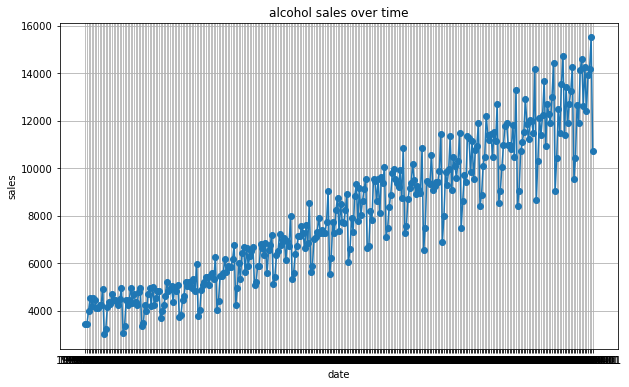

In [73]:
plt.figure(figsize=(10,6))
plt.plot(data.index,data['S4248SM144NCEN'],marker='o')
plt.title('alcohol sales over time')
plt.xlabel('date')
plt.ylabel('sales')
plt.grid(True)
plt.show()

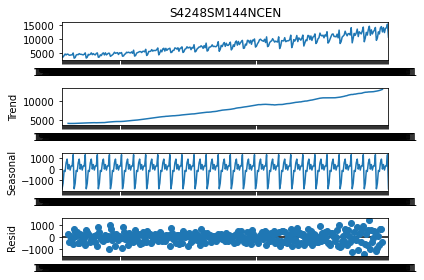

In [74]:
from statsmodels.tsa.seasonal import seasonal_decompose
result=seasonal_decompose(data['S4248SM144NCEN'],model='additive',period=12)
result.plot()
plt.show()

# ARIMA MODEL

C:\Users\jospo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\jospo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\jospo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


ARIMA RMSE 1614.3512276038925
ARIMA MAE 1279.104054316736


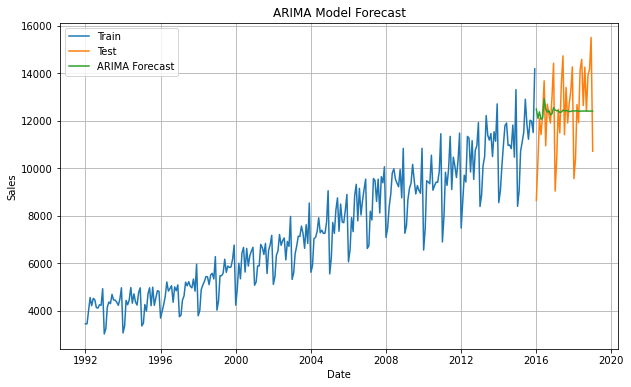

In [88]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np




data['DATE'] = pd.to_datetime(data['DATE'], errors='coerce')


if data['DATE'].isnull().any():
    print("There are issues with date parsing. Here are the problematic rows:")
    print(data[data['Date'].isnull()])
    # Handle or drop problematic rows
    data = data.dropna(subset=['Date'])


data.set_index('DATE', inplace=True)


train = data[:'2015-12-01']
test = data['2016-01-01':]


model_arima = ARIMA(train['S4248SM144NCEN'], order=(5, 1, 0))
model_arima_fit = model_arima.fit()


forecast_arima = model_arima_fit.forecast(steps=len(test))
forecast_arima = pd.Series(forecast_arima, index=test.index)


rmse_arima = np.sqrt(mean_squared_error(test['S4248SM144NCEN'], forecast_arima))
mae_arima = mean_absolute_error(test['S4248SM144NCEN'], forecast_arima)
print('ARIMA RMSE',rmse_arima)
print('ARIMA MAE',mae_arima)


plt.figure(figsize=(10, 6))
plt.plot(train.index, train['S4248SM144NCEN'], label='Train')
plt.plot(test.index, test['S4248SM144NCEN'], label='Test')
plt.plot(forecast_arima.index, forecast_arima, label='ARIMA Forecast')
plt.title('ARIMA Model Forecast')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.grid(True)
plt.show()
